# Atividade 02: Tratamento e Preparação dos Dados - Preços dos Carros no Brasil

Aluno: Marcel Pontes  
Engenharia e Análise de Dados  
CESAR School  
11/05/2025

## Parte 1


### Importando o dataset

In [2]:
import pandas as pd
df = pd.read_csv("precos_carros_brasil.csv")

/var/folders/y8/rfm38z_x3693zpsbvthdb2bw0000gp/T/ipykernel_63816/4150979060.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("precos_carros_brasil.csv")


In [3]:
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267542 entries, 0 to 267541
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   202297 non-null  float64
 1   month_of_reference  202297 non-null  object 
 2   fipe_code           202297 non-null  object 
 3   authentication      202297 non-null  object 
 4   brand               202297 non-null  object 
 5   model               202297 non-null  object 
 6   fuel                202297 non-null  object 
 7   gear                202297 non-null  object 
 8   engine_size         202297 non-null  object 
 9   year_model          202297 non-null  float64
 10  avg_price_brl       202297 non-null  float64
dtypes: float64(3), object(8)
memory usage: 22.5+ MB


In [5]:
df.isnull().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

### Tratando os valores nulos

Para descobrir como se agrupam os registros com valores nulos, decidiu-se comparar o total de linhas do dataset que possuem valores faltantes em quaisquer colunas com o total no qual todas as colunas estão com dados faltantes como visto a seguir:

In [6]:
rows_with_null_any = df[df.isnull().any(axis=1)]
rows_with_null_all = df[df.isnull().all(axis=1)]

print(f"Linhas com valores faltantes em qualquer coluna: {len(rows_with_null_any)}")
print(f"Linhas com valores faltantes em todas as colunas: {len(rows_with_null_all)}")


Linhas com valores faltantes em qualquer coluna: 65245
Linhas com valores faltantes em todas as colunas: 65245


Vericado que os números são exatamente iguais, conclui-se que todas as entradas do dataset que possuem valores não preenchidos faltam valores para todas as colunas ao mesmo tempo. Consequentemente, a melhor decisão seria de remover essas linhas já que não haveria informação perdida com isso.

In [7]:
df_filtered = df.dropna()
nan_count = df_filtered.isnull().sum().sum()
print("Número de valores faltantes após a filtragem: ", nan_count)

Número de valores faltantes após a filtragem:  0


### Tratando as linhas duplicadas

In [8]:
duplicated_rows = df_filtered[df_filtered.duplicated(keep=False)]
duplicated_rows.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
45791,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0
45793,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0
189895,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0
189896,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0


In [9]:
print("Número de linhas duplicadas: ", len(duplicated_rows))

Número de linhas duplicadas:  4


Observando a coluna "authentication", nota-se se que seus valores deveriam representar valores únicos de cada carro registrado no dataset. Assim, ao ver que as linhas duplicadas são justamente as únicas em que os dados dessa coluna se repetem, confirma-se que essas linhas realmente devem ter sido repetidas por engano, deste modo, devem ser removidas do estudo.

In [10]:
duplicates = df_filtered['authentication'].duplicated(keep=False).sum()
print("Total de linhas duplicadas:", duplicates)

Total de linhas duplicadas: 4


In [11]:
print("Total de linhas pré-remoção:", len(df_filtered))
df_filtered.drop_duplicates(inplace=True)
print("Total pós-remoção:", len(df_filtered))

Total de linhas pré-remoção: 202297
Total pós-remoção: 202295


/var/folders/y8/rfm38z_x3693zpsbvthdb2bw0000gp/T/ipykernel_63816/3178670003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)


### Estatísticas descritivas do dataset

Na análise dos dados numéricos, observa-se que
- Os anos dos modelos de carro registrados começam a partir de 2000 em uma distribuição centrada em 2012 e com 50% dos registros se concentrando entre 2006 e 2016.
- O preço médio em reais de todos os carros registrados é de 53 mil; porém, metade dos valores registrados fica abaixo de 38 mil. Além disso, um desvio padrão tão próximo do valor médio sugere uma distribuição com forte característica de uniformidade.

In [12]:
df_filtered.describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


No agrupamento entre as categorias de câmbio, pode-se perceber que o número de carros manuais é quatro vezes o de automáticos.

In [13]:
print('Contagem do agrupamento por gear')
df_filtered.groupby('gear')['authentication'].count().sort_values(ascending=False)

Contagem do agrupamento por gear


gear
manual       161883
automatic     40412
Name: authentication, dtype: int64

Já a contagem de classes de combustível indica que a gasolina tem ampla vantagem frente ao diesel (5,6x), que, por sua vez, tem aproximadamente oito vezes o número de carros a álcool.

In [14]:
print('Contagem do agrupamento por fuel')
df_filtered.groupby('fuel')['authentication'].count().sort_values(ascending=False)

Contagem do agrupamento por fuel


fuel
Gasoline    168684
Diesel       30098
Alcohol       3513
Name: authentication, dtype: int64

Quanto às marcas dos veículos, seis montadoras foram encontradas com Fiat liderando e VolksWagen logo em seguida. Chevrolet, Ford e Renault também representam uma quantidade significativa, sendo a Nissan a menos comum dentre as registradas.

In [15]:
print('Contagem do agrupamento por brand')
df_filtered.groupby('brand')['authentication'].count().sort_values(ascending=False)

Contagem do agrupamento por brand


brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: authentication, dtype: int64

Quando feito um agrupamento dos dados pelo ano de referência na tabela e o câmbio nesta ordem e calculada a média dos preços por categoria, observa-se que, ano a ano, tanto carros automáticos quanto manuais ficaram mais caros no Brasil.

In [16]:
aggregate_series = df_filtered.groupby(['year_of_reference','gear'])['avg_price_brl'].mean().sort_index(ascending=True)
aggregate_series

year_of_reference  gear     
2021.0             automatic    73884.774935
                   manual       41129.769654
2022.0             automatic    88884.880775
                   manual       49394.834204
2023.0             automatic    89758.728127
                   manual       50219.819368
Name: avg_price_brl, dtype: float64

Separando a tabela MultiIndex entre a de carros manuais e a de automáticos e calculando a diferença percentual entre nas vendas de cada tipo de um ano para outro, observa-se que um crescimento de aproximadamente 20% nos preços médios de ambos tipos de 2021 para 2022. <br>
Por outro lado, de 2022 para 2023, a média de preços de carros automáticos subiu em torno de 1%, enquanto a de manuais aumentou 1,7%, porém essa pequena variação pode ter influência no fato de haver apenas 1 mês de registros no último ano. 

In [17]:
automatic_avg = aggregate_series.swaplevel().loc['automatic']
manual_avg = aggregate_series.swaplevel().loc['manual']

In [18]:
automatic_avg.pct_change().dropna()

year_of_reference
2022.0    0.203020
2023.0    0.009831
Name: avg_price_brl, dtype: float64

In [19]:
manual_avg.pct_change().dropna()

year_of_reference
2022.0    0.200951
2023.0    0.016702
Name: avg_price_brl, dtype: float64

### Insights sobre os dados 

- O número de carros manuais vendidos no Brasil no período observado (2021 a Jan/23) ainda é 4x o número de carros automáticos.
- A gasolina é o combustível mais comumente usado entre os carros comercializados; o diesel é o segundo, enquanto o álcool é o terceiro.
- A Fiat é a marca líder de vendas seguida de perto pela VolksWagen, enquanto a Nissan é a que menos aparece no dataset.
- A média de preço dos carros de câmbio automático é bem superior à dos manuais, porém ambas subiram em 20% de 2021 a 2022.

## Parte 2

### Gráfico da distribuição da quantidade de carros por marca:

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Quantidade de carros vendidos por marca')

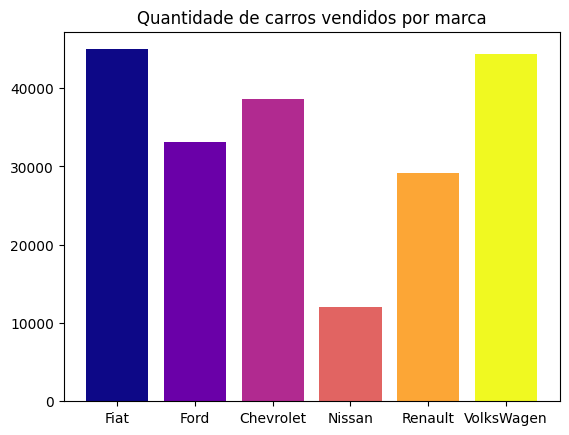

In [21]:
df_gb_brand = df_filtered.groupby('brand')['authentication'].count()
df_gb_brand.rename(index={"VW - VolksWagen":"VolksWagen", "GM - Chevrolet":"Chevrolet"}, inplace=True)
colors = plt.get_cmap('plasma',len(df_gb_brand)).colors
plt.bar(df_gb_brand.index, df_gb_brand.values, color=colors)
plt.title("Quantidade de carros vendidos por marca")

### Gráfico da distribuição da quantidade de carros por tipo de câmbio:

Text(0.5, 1.0, 'Quantidade de carros vendidos por tipo de câmbio')

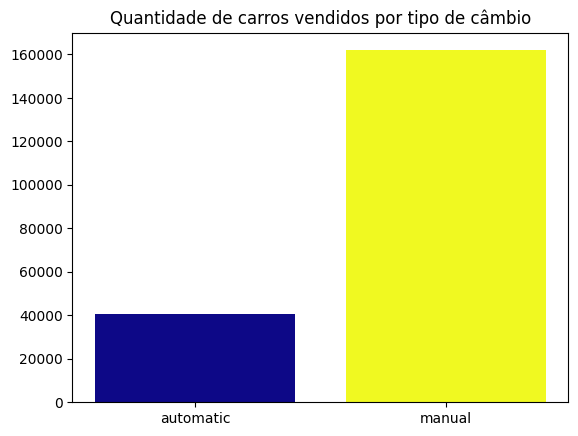

In [22]:
df_gb_gear = df_filtered.groupby('gear')['authentication'].count()
colors = plt.get_cmap('plasma',len(df_gb_gear)).colors
plt.bar(df_gb_gear.index, df_gb_gear.values, color=colors)
plt.title("Quantidade de carros vendidos por tipo de câmbio")

### Gráfico da evolução da média de preço dos carros ao longo de 2022:

In [30]:
df_grouped_month = df_filtered.loc[df_filtered['year_of_reference'] == 2022].groupby(['month_of_reference'])['avg_price_brl'].mean()
df_grouped_month

month_of_reference
April        57150.037325
August       57923.544105
December     57997.243992
February     55824.519882
January      54840.270037
July         57893.997056
June         58065.611398
March        56848.951914
May          57799.763776
November     58215.626236
October      58227.410144
September    58198.936989
Name: avg_price_brl, dtype: float64

Renomeando os indíces da series e os reordenando de janeiro a dezembro.

In [32]:
df_grouped_month.rename(index=lambda x: x[:3], inplace=True)
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_grouped_month = df_grouped_month.reindex(new_order)

Text(0.5, 1.0, 'Evolução da média de preço dos carros em 2022')

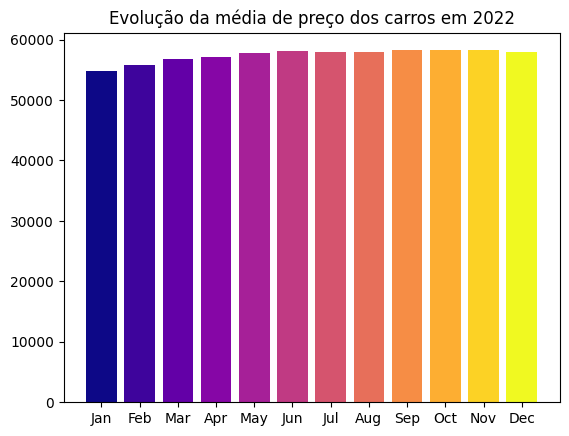

In [35]:
colors = plt.get_cmap('plasma',len(df_grouped_month)).colors
plt.bar(df_grouped_month.index, df_grouped_month.values, color=colors)
plt.title("Evolução da média de preço dos carros em 2022")

Observa-se que, em 2022, a média de preços ficou bem estável ao longo do ano, em torno de R$ 58 mil e com uma leve redução nos primeiros meses do ano.
Um fator que poderia explicar essa ocorrência seria a incidência da impostos cobrada comumente no início do ano, o que poderia fazer com que alguns vendedores baixassem o preço dos seus automóveis para repassar a diferença através do imposto para os compradores.

### Gráfico da distribuição da média de preços por marca e engrenagem:

In [37]:
df_grouped_brand_gear = df_filtered.groupby(['brand','gear'])['avg_price_brl'].mean()
df_grouped_brand_gear

brand            gear     
Fiat             automatic    97396.801936
                 manual       39694.442749
Ford             automatic    84769.106720
                 manual       51784.334861
GM - Chevrolet   automatic    88156.919439
                 manual       52119.422129
Nissan           automatic    94230.600604
                 manual       52680.623596
Renault          automatic    44028.007521
                 manual       47648.795606
VW - VolksWagen  automatic    99734.979181
                 manual       40390.327451
Name: avg_price_brl, dtype: float64

Text(0.5, 1.0, 'Média de preços por marca e câmbio')

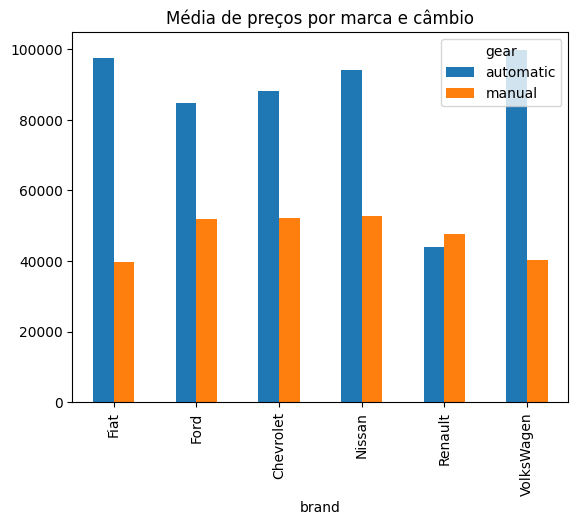

In [ ]:
df_grouped_brand_gear_unstacked = df_grouped_brand_gear.unstack()
df_grouped_brand_gear_unstacked.rename(index={"VW - VolksWagen":"VolksWagen", "GM - Chevrolet":"Chevrolet"}, inplace=True)
df_grouped_brand_gear_unstacked.plot(kind='bar')
plt.title("Média de preços por marca e câmbio")

Análise gráfica, permite observar que
- A Renault é a única marca cuja média de preço de carros manuais foi superior à de automáticos
- Fiat e Volkswagen apresentaram a maior disparidade entre as médias preços de carros automáticos e manuais

### Gráfico da distribuição das médias de preço por marca e combustível:

In [42]:
df_gb_brand_fuel = df_filtered.groupby(['brand','fuel'])['avg_price_brl'].mean()
df_grouped_brand_gear

brand            fuel    
Fiat             Alcohol      11509.514419
                 Diesel       99814.451429
                 Gasoline     37197.294483
Ford             Alcohol      10148.906667
                 Diesel       94525.533794
                 Gasoline     45844.524969
GM - Chevrolet   Alcohol      13697.717687
                 Diesel       99817.318601
                 Gasoline     56497.127255
Nissan           Diesel       95534.071529
                 Gasoline     59043.288090
Renault          Diesel      104529.925499
                 Gasoline     37058.005993
VW - VolksWagen  Alcohol      13392.684507
                 Diesel      139216.276328
                 Gasoline     44653.797430
Name: avg_price_brl, dtype: float64

Text(0.5, 1.0, 'Média de preços por marca e tipo de combustível')

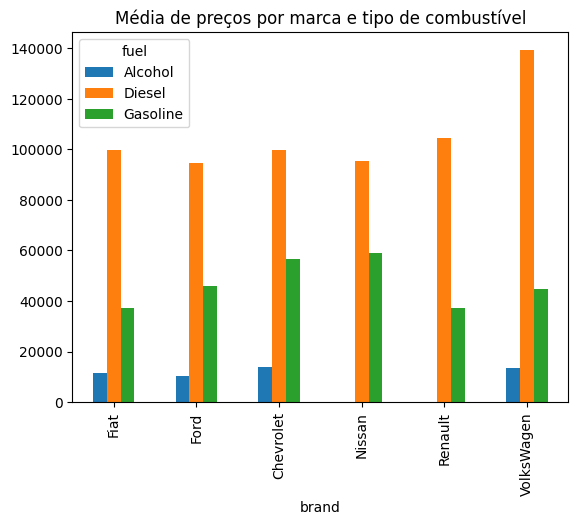

In [43]:
df_grouped_brand_gear_unstacked = df_grouped_brand_gear.unstack()
df_grouped_brand_gear_unstacked.rename(index={"VW - VolksWagen":"VolksWagen", "GM - Chevrolet":"Chevrolet"}, inplace=True)
df_grouped_brand_gear_unstacked.plot(kind='bar')
plt.title("Média de preços por marca e tipo de combustível")

É possível notar no gráfico acima que
- Os preços de carros a diesel são bastante estáveis entre as marcas com exceção da Volkswagen, que tem valores consideravelmente mais elevados.
- A Nissan e a Renault aparentemente não tiveram carros a álcool comercializados dentro do período observado.
- Nissan, Chevrolet e Ford, nessa ordem, são as montadores com a menor diferença média de preços entre carros a gasolina e a diesel. Mesmo assim, essa diferença continua significativa.